In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

torch.manual_seed(42)

In [2]:
# Distance in miles
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
# Delivery times in minutes
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

In [3]:
# Define the model
model = nn.Sequential(nn.Linear(1, 1))

In [4]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(distances)
    loss = loss_function(outputs, times)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch + 1}: Loss = {loss.item()}")

Epoch: 50: Loss = 0.03944866359233856
Epoch: 100: Loss = 0.03581171855330467
Epoch: 150: Loss = 0.03311903774738312
Epoch: 200: Loss = 0.03112369030714035
Epoch: 250: Loss = 0.02964562550187111
Epoch: 300: Loss = 0.02855011820793152
Epoch: 350: Loss = 0.0277385413646698
Epoch: 400: Loss = 0.027137158438563347
Epoch: 450: Loss = 0.026691768318414688
Epoch: 500: Loss = 0.026361485943198204


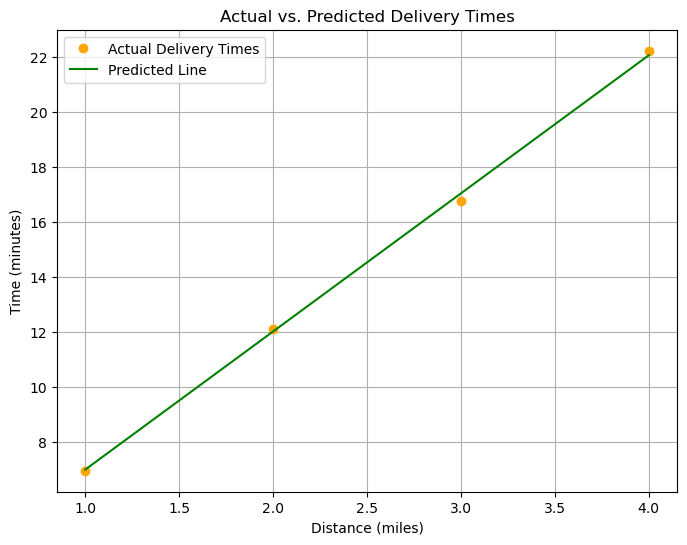

In [6]:
helper_utils.plot_results(model, distances, times)

In [7]:
distance_to_predict = 7.0

In [8]:
with torch.no_grad():
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)

    predicted_time = model(new_distance)

    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

    if predicted_time.item() > 30:
        print("\nDecision: Do NOT take the job. You will likely be late.")
    else:
        print("\nDecision: Take the job. You can make it!")

Prediction for a 7.0-mile delivery: 37.1 minutes

Decision: Do NOT take the job. You will likely be late.


In [9]:
# Access the first (and only) layer in the sequential model
layer = model[0]

weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weights: {weights}")
print(f"Bias: {bias}")

Weights: [[5.015503]]
Bias: [1.9849643]


In [10]:
# Combined dataset: bikes for short distances, cars for longer ones
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

In [11]:
with torch.no_grad():
    predictions = model(new_distances)

In [12]:
new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 179.26


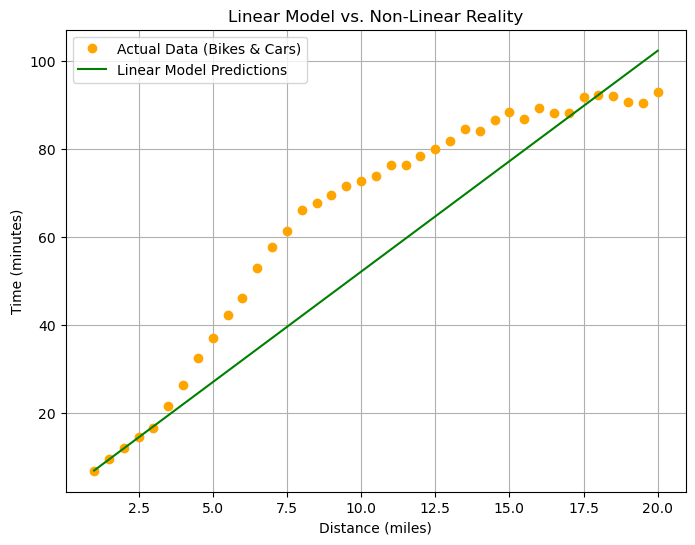

In [13]:
helper_utils.plot_nonlinear_comparison(model, new_distances, new_times)